# Install OpenCV and imutils

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imutils

# Importing necessary libraries

In [3]:
import cv2
import imutils
from imutils.object_detection import non_max_suppression
from matplotlib import pyplot as plt

# Reading the Image

In [4]:
image=cv2.imread('image.jpg')

# Initializing the HOG person

In [5]:
hog=cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Resizing the image

In [6]:
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
image=imutils.resize(gray,width=min(600,image.shape[1]))  #resizing 

# Detecting all humans

In [7]:
(humans,_)=hog.detectMultiScale(image,
                            winStride=(4,4),
                            padding=(3,3),
                            scale=1.21)

Applying non max suppression

In [8]:
humans_nms=non_max_suppression(humans,probs=None,overlapThresh=0.65)
counter=0           #initializing the counter

# Drawing the rectangle regions

In [9]:
for(x,y,w,h) in humans_nms:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
    counter+=1  #increasing the counter

# Displaying number of humans in frame

In [10]:
cv2.putText(image,f'Number of Humans:{int(counter)}',(5,30),cv2.FONT_HERSHEY_COMPLEX,.7,(0,0,255),1)

array([[121, 122, 122, ..., 123, 123, 123],
       [122, 121, 122, ..., 123, 123, 123],
       [121, 121, 121, ..., 123, 124, 123],
       ...,
       [ 36,  37,  37, ...,  38,  38,  39],
       [ 36,  35,  35, ...,  37,  38,  39],
       [ 36,  36,  36, ...,  37,  37,  37]], dtype=uint8)

# Displaying image

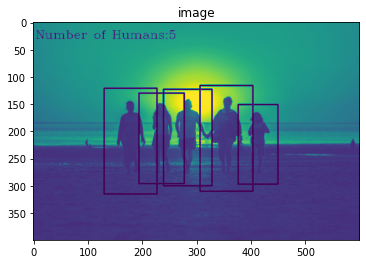

In [11]:
plt.imshow(image)
plt.title('image')
plt.show()